# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
!kaggle datasets download -d khaledzsa/bus-breakdown-and-delays
!unzip bus-breakdown-and-delays.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays
License(s): unknown
 84% 4.00M/4.75M [00:01<00:00, 4.32MB/s]
100% 4.75M/4.75M [00:01<00:00, 3.63MB/s]
Archive:  bus-breakdown-and-delays.zip
  inflating: Bus_Breakdown_and_Delays.csv  


## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import keras

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [3]:
df = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')

In [4]:
df.sample(10)

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
38737,2015-2016,1258899,Special Ed AM Run,803,N626,Heavy Traffic,75914,03/30/2016 07:17:00 AM,03/30/2016 07:18:00 AM,Nassau County,...,30MINS,0,Yes,Yes,No,03/30/2016 07:18:00 AM,NaN,03/30/2016 07:18:47 AM,Running Late,School-Age
27408,2015-2016,1247343,Special Ed AM Run,465,K590,Heavy Traffic,14050,02/01/2016 07:55:00 AM,02/01/2016 08:00:00 AM,Brooklyn,...,?,8,Yes,Yes,No,02/01/2016 08:00:00 AM,NaN,02/01/2016 08:00:54 AM,Running Late,School-Age
118073,2016-2017,1339271,Special Ed AM Run,1641,M604,Heavy Traffic,04112,04/07/2017 06:41:00 AM,04/07/2017 06:42:00 AM,Manhattan,...,20mnts,0,Yes,Yes,No,04/07/2017 06:42:00 AM,NaN,04/07/2017 06:42:32 AM,Running Late,School-Age
34279,2015-2016,1254288,Special Ed AM Run,129,W740,Problem Run,75550,03/07/2016 07:51:00 AM,03/07/2016 07:57:00 AM,Westchester,...,15 mins,15,Yes,No,No,03/07/2016 07:57:00 AM,NaN,03/07/2016 08:04:08 AM,Running Late,School-Age
59520,2016-2017,1280233,Pre-K/EI,357,1,Heavy Traffic,S176,08/01/2016 06:55:00 AM,08/01/2016 06:55:00 AM,Bronx,...,20 MINS,0,Yes,Yes,No,08/01/2016 06:55:00 AM,NaN,08/01/2016 06:55:54 AM,Running Late,Pre-K
77498,2016-2017,1298265,Special Ed AM Run,2906,K159,Accident,32075,11/07/2016 07:33:00 AM,11/07/2016 07:40:00 AM,Brooklyn,...,40MINS,8,Yes,Yes,No,11/07/2016 07:40:00 AM,NaN,11/07/2016 07:40:06 AM,Running Late,School-Age
91392,2016-2017,1312165,Special Ed PM Run,016295,X856,Won`t Start,09117,01/04/2017 01:58:00 PM,01/04/2017 02:04:00 PM,Bronx,...,NaN,0,Yes,Yes,No,01/04/2017 02:04:00 PM,NaN,01/04/2017 02:04:03 PM,Breakdown,School-Age
124024,2016-2017,1345319,General Ed AM Run,26679,K2498,Heavy Traffic,20205,05/04/2017 06:30:00 AM,05/04/2017 06:45:00 AM,Brooklyn,...,5/6 mins,0,Yes,No,Yes,05/04/2017 06:45:00 AM,NaN,05/04/2017 06:45:44 AM,Running Late,School-Age
59650,2016-2017,1280359,Pre-K/EI,1200,JB-01,Other,C133,08/01/2016 02:45:00 PM,08/01/2016 02:54:00 PM,Queens,...,20 MINS,8,Yes,Yes,Yes,08/01/2016 02:54:00 PM,NaN,08/01/2016 02:54:07 PM,Running Late,Pre-K
134414,2016-2017,1346711,Pre-K/EI,343,2,Other,C530,05/09/2017 07:25:00 AM,05/09/2017 07:26:00 AM,Bronx,...,20-30,2,Yes,Yes,No,05/09/2017 07:26:00 AM,NaN,05/09/2017 07:26:15 AM,Running Late,Pre-K


In [5]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [6]:
df.tail()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,...,15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,NaN,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,...,20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,NaN,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,...,20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,...,NaN,0,Yes,Yes,No,05/25/2017 04:30:00 PM,NaN,05/25/2017 04:30:07 PM,Breakdown,School-Age
147971,2016-2017,1353046,Project Read PM Run,2530,K617,Other,21436,05/25/2017 04:36:00 PM,05/25/2017 04:37:00 PM,Brooklyn,...,45min,7,Yes,Yes,Yes,05/25/2017 04:37:00 PM,NaN,05/25/2017 04:37:37 PM,Running Late,School-Age


In [7]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [8]:
df.shape

(147972, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [10]:
df.columns

Index(['School_Year', 'Busbreakdown_ID', 'Run_Type', 'Bus_No', 'Route_Number',
       'Reason', 'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro',
       'Bus_Company_Name', 'How_Long_Delayed', 'Number_Of_Students_On_The_Bus',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Incident_Number',
       'Last_Updated_On', 'Breakdown_or_Running_Late', 'School_Age_or_PreK'],
      dtype='object')

In [11]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


<Axes: >

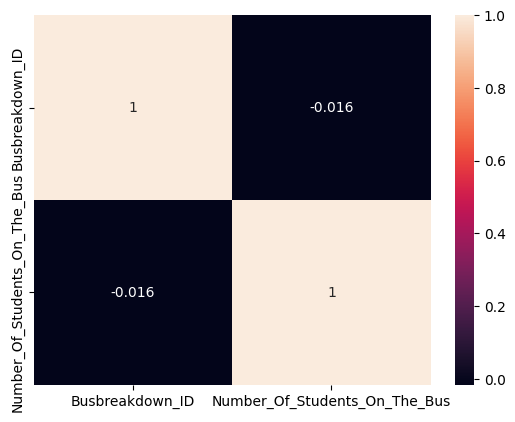

In [12]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

<Axes: ylabel='Count'>

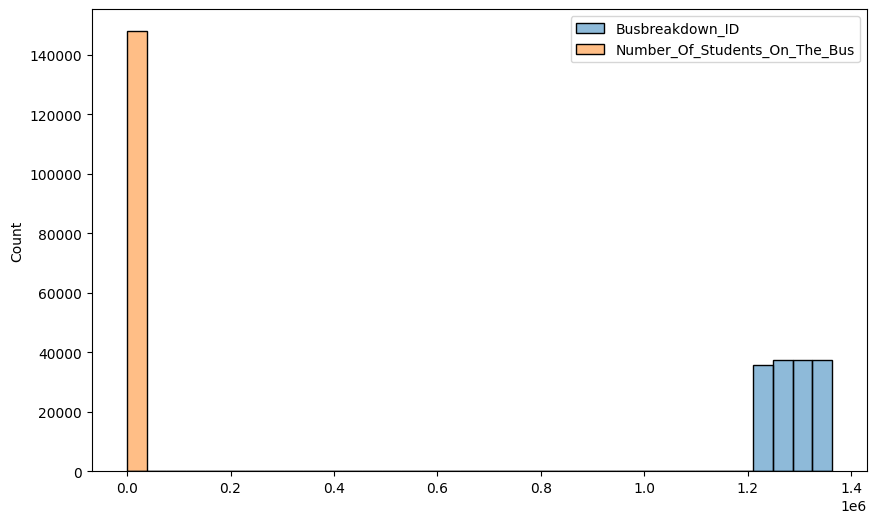

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df)

<Axes: >

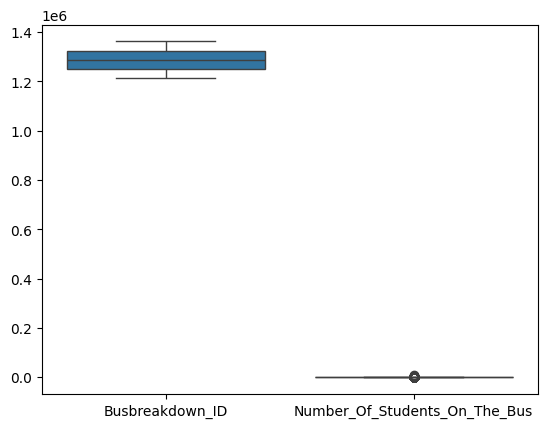

In [14]:
# I heard that boxplot is good to detect outliers

sns.boxplot(df)

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [15]:
df.drop(columns='Incident_Number', axis=1, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [17]:
# imputing
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()
for i in df.select_dtypes(include=['number']).columns:
  df[i] = imputer.fit_transform(df[[i]])

In [18]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [19]:
df['School_Year'].value_counts()

,count
School_Year,
2016-2017,83141
2015-2016,63184
2017-2018,1646
2019-2020,1


In [20]:
df['School_Year'] = df['School_Year'].replace('2016-2017', '2016')
df['School_Year'] = df['School_Year'].replace('2015-2016', '2015')
df['School_Year'] = df['School_Year'].replace('2017-2018', '2017')
df['School_Year'] = df['School_Year'].replace('2019-2020', '2019')

In [21]:
# Was trying to convert it to datetime for useful relations but didnt work

#for i in df.shape[0]:
#  df.iloc[i, 'School_Year'] = pd.to_datetime(df.iloc[i, 'School_Year'], format='%Y')

In [22]:
df.dropna(inplace=True)

In [23]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0


In [24]:
df

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015,1224901.0,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,"G.V.C., LTD.",10MINUTES,5.0,Yes,Yes,No,10/26/2015 08:40:00 AM,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015,1225098.0,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,"G.V.C., LTD.",25 MINUTES,3.0,Yes,Yes,No,10/27/2015 07:11:00 AM,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015,1215800.0,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,"G.V.C., LTD.",15 MINUTES,12.0,Yes,Yes,Yes,09/18/2015 07:38:00 AM,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015,1215511.0,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,"G.V.C., LTD.",10 minutes,11.0,Yes,Yes,Yes,09/17/2015 08:12:00 AM,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015,1215828.0,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,"G.V.C., LTD.",10MINUTES,12.0,Yes,Yes,No,09/18/2015 07:45:00 AM,09/18/2015 07:56:40 AM,Running Late,Pre-K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147966,2016,1337850.0,Pre-K/EI,118,3,Heavy Traffic,C037,04/04/2017 07:55:00 AM,04/04/2017 08:03:00 AM,Bronx,"G.V.C., LTD.",15-20,8.0,Yes,Yes,No,04/04/2017 08:03:00 AM,04/04/2017 08:03:45 AM,Running Late,Pre-K
147967,2016,1338452.0,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,"G.V.C., LTD.",15-20,7.0,Yes,Yes,No,04/05/2017 08:10:00 AM,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016,1341521.0,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,"G.V.C., LTD.",20 MINS,0.0,Yes,Yes,No,04/24/2017 07:44:00 AM,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016,1353044.0,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,G.V.C. LTD. (B2192),20-25MINS,0.0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,05/25/2017 04:34:36 PM,Running Late,School-Age


In [25]:
# Was trying to include this data and convert it to_datetime() but i have no time to look for it in the documentation
df['How_Long_Delayed'] = df['How_Long_Delayed'].replace(' minutes', '')
df['How_Long_Delayed'] = df['How_Long_Delayed'].replace(' min', '')
df['How_Long_Delayed'] = df['How_Long_Delayed'].replace('min', '')
df['How_Long_Delayed'] = df['How_Long_Delayed'].replace('MIN', '')
df['How_Long_Delayed'] = df['How_Long_Delayed'].replace(' MIN', '')
df['How_Long_Delayed'] = df['How_Long_Delayed'].replace('mn', '')
df['How_Long_Delayed'] = df['How_Long_Delayed'].replace('MINS', '')
df['How_Long_Delayed'] = df['How_Long_Delayed'].replace(' mins', '')
df['How_Long_Delayed'] = df['How_Long_Delayed'].replace(' MINUTES', '')
df['How_Long_Delayed'] = df['How_Long_Delayed'].replace('MINUTES', '')
df['How_Long_Delayed'] = df['How_Long_Delayed'].replace(' MINS', '')
df['How_Long_Delayed'] = df['How_Long_Delayed'].replace('?', np.nan)

In [26]:
df['How_Long_Delayed']

,How_Long_Delayed
0,10MINUTES
1,25 MINUTES
2,15 MINUTES
3,10 minutes
4,10MINUTES
...,...
147966,15-20
147967,15-20
147968,20 MINS
147969,20-25MINS


In [27]:
df.duplicated().sum()

0

In [28]:
# in case any duplactes drop
df.drop

<bound method DataFrame.drop of        School_Year  Busbreakdown_ID             Run_Type  Bus_No Route_Number  \
0             2015        1224901.0             Pre-K/EI     811            1   
1             2015        1225098.0             Pre-K/EI    9302            1   
2             2015        1215800.0             Pre-K/EI     358            2   
3             2015        1215511.0             Pre-K/EI     331            2   
4             2015        1215828.0             Pre-K/EI     332            2   
...            ...              ...                  ...     ...          ...   
147966        2016        1337850.0             Pre-K/EI     118            3   
147967        2016        1338452.0             Pre-K/EI    9345            2   
147968        2016        1341521.0             Pre-K/EI    0001            5   
147969        2016        1353044.0    Special Ed PM Run  GC0112         X928   
147971        2016        1353046.0  Project Read PM Run    2530         K617   

               Reason Schools_Serviced             Occurred_On  \
0               Other             C353  10/26/2015 08:30:00 AM   
1       Heavy Traffic             C814  10/27/2015 07:10:00 AM   
2       Heavy Traffic             C195  09/18/2015 07:36:00 AM   
3               Other             C178  09/17/2015 08:08:00 AM   
4               Other             S176  09/18/2015 07:39:00 AM   
...               ...              ...                     ...   
147966  Heavy Traffic             C037  04/04/2017 07:55:00 AM   
147967  Heavy Traffic             C530  04/05/2017 08:00:00 AM   
147968  Heavy Traffic             C579  04/24/2017 07:42:00 AM   
147969  Heavy Traffic            09003  05/25/2017 04:22:00 PM   
147971          Other            21436  05/25/2017 04:36:00 PM   

                    Created_On      Boro           Bus_Company_Name  \
0       10/26/2015 08:40:00 AM     Bronx               G.V.C., LTD.   
1       10/27/2015 07:11:00 AM     Bronx               G.V.C., LTD.   
2       09/18/2015 07:38:00 AM     Bronx               G.V.C., LTD.   
3       09/17/2015 08:12:00 AM     Bronx               G.V.C., LTD.   
4       09/18/2015 07:45:00 AM     Bronx               G.V.C., LTD.   
...                        ...       ...                        ...   
147966  04/04/2017 08:03:00 AM     Bronx               G.V.C., LTD.   
147967  04/05/2017 08:10:00 AM     Bronx               G.V.C., LTD.   
147968  04/24/2017 07:44:00 AM     Bronx               G.V.C., LTD.   
147969  05/25/2017 04:28:00 PM     Bronx        G.V.C. LTD. (B2192)   
147971  05/25/2017 04:37:00 PM  Brooklyn  RELIANT TRANS, INC. (B232   

       How_Long_Delayed  Number_Of_Students_On_The_Bus  \
0             10MINUTES                            5.0   
1            25 MINUTES                            3.0   
2            15 MINUTES                           12.0   
3            10 minutes                           11.0   
4             10MINUTES                           12.0   
...                 ...                            ...   
147966            15-20                            8.0   
147967            15-20                            7.0   
147968          20 MINS                            0.0   
147969        20-25MINS                            0.0   
147971            45min                            7.0   

       Has_Contractor_Notified_Schools Has_Contractor_Notified_Parents  \
0                                  Yes                             Yes   
1                                  Yes                             Yes   
2                                  Yes                             Yes   
3                                  Yes                             Yes   
4                                  Yes                             Yes   
...                                ...                             ...   
147966                             Yes                             Yes   
147967                             Yes                      

In [29]:
X = df.drop(columns='Breakdown_or_Running_Late', axis=1)
y = df['Breakdown_or_Running_Late']

In [30]:
X.columns

Index(['School_Year', 'Busbreakdown_ID', 'Run_Type', 'Bus_No', 'Route_Number',
       'Reason', 'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro',
       'Bus_Company_Name', 'How_Long_Delayed', 'Number_Of_Students_On_The_Bus',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Last_Updated_On',
       'School_Age_or_PreK'],
      dtype='object')

In [31]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()
le = LabelEncoder()

for i in X.select_dtypes(include=['number']).columns:
  X[i] = scaler.fit_transform(X[[i]])

for i in X.select_dtypes(include=['object']).columns:
  X[i] = le.fit_transform(X[[i]])

y = le.fit_transform(y)

In [32]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [33]:
y = pd.DataFrame(y)

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [34]:
y.value_counts()

,count
0,
1,120542
0,11


In [35]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = over_sampler.fit_resample(X, y)

In [36]:
y_resampled.value_counts()

,count
0,
0,120542
1,120542


In [37]:
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [38]:
X_train.shape

(192867, 19)

In [39]:
y_train.value_counts()

,count
0,
1,96698
0,96169


In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192867 entries, 138435 to 121958
Data columns (total 19 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   School_Year                      192867 non-null  int64  
 1   Busbreakdown_ID                  192867 non-null  float64
 2   Run_Type                         192867 non-null  int64  
 3   Bus_No                           192867 non-null  int64  
 4   Route_Number                     192867 non-null  int64  
 5   Reason                           192867 non-null  int64  
 6   Schools_Serviced                 192867 non-null  int64  
 7   Occurred_On                      192867 non-null  int64  
 8   Created_On                       192867 non-null  int64  
 9   Boro                             192867 non-null  int64  
 10  Bus_Company_Name                 192867 non-null  int64  
 11  How_Long_Delayed                 192867 non-null  int64  
 12  Nu

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(6, input_dim=X_train.shape[1] ,activation='relu'))

model.add(Dense(6, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [42]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [43]:
history = model.fit(X_train, y_train, epochs=30, batch_size=64 , validation_data=(X_val, y_val))

Epoch 1/30
3014/3014 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.5089 - loss: 602.2765 - val_accuracy: 0.5798 - val_loss: 43.6570
Epoch 2/30
3014/3014 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5878 - loss: 20.1942 - val_accuracy: 0.6345 - val_loss: 11.0149
Epoch 3/30
3014/3014 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6114 - loss: 17.5300 - val_accuracy: 0.6086 - val_loss: 24.6954
Epoch 4/30
3014/3014 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6258 - loss: 16.5759 - val_accuracy: 0.7127 - val_loss: 4.0157
Epoch 5/30
3014/3014 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6340 - loss: 15.4489 - val_accuracy: 0.6526 - val_loss: 5.3010
Epoch 6/30
3014/3014 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6384 - loss: 13.9086 - val_accuracy: 0.7064 - val_loss: 4.6527
Epoch 7/30
3014/3014 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6467 - loss: 12.4725 - val_accuracy: 0.6091 - val_loss: 3.9368
Epoch 8/30
3014/3014 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6543 - 

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [44]:
model.evaluate(X_test,y_test)

377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8429 - loss: 4.3288


[4.164651393890381, 0.8467026352882385]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [45]:
ypred = model.predict(X_test)
ypred

377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[1.0000000e+00],
       [1.0000000e+00],
       [5.1801825e-15],
       ...,
       [1.9827688e-02],
       [3.0723199e-22],
       [9.9496386e-20]], dtype=float32)

In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 509 (1.99 KB)

 Trainable params: 169 (676.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 340 (1.33 KB)

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

377/377 - 1s - 1ms/step - accuracy: 0.8467 - loss: 4.1647


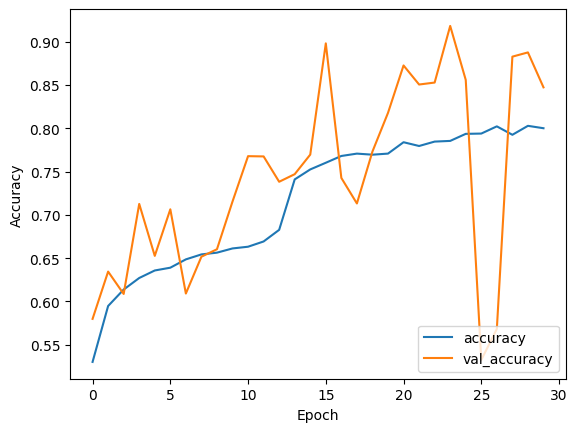

In [49]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

## Save the Model
Save the trained model for submission.

In [48]:
model.save('model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

  - A1/ Used simple imputer to fill the nulls if there is any. Used label encoder to encode categorical columns. and standeredscaler to scale using the mean and standard diviation.

  - A2/ I used 6 neurons as input layers, 6 for hidden layers and 1 for binary_crossentropy. I have researched and found that ANN is diffecult to find the best hyperparameters.

  - A3/ Used 64 batch_size saw that it was good with my testing, 30 epochs which was good enough.and adam optimizer because it is known that it is the best default optimizer.

  - A4/ Used mostly relu because i wanted the values that go to the neurons be positive values. and sigmoid for binary classification.

  - A5/ I did't i ran out of time :(.

  - A6/ I used accuracy and val_accuracy to view the values per epoch.

  - A7/ I have played the neurons numbers, batch_size and epochs and found out the values that i have chosen are good.

  - A8/ I think my model has a good fit of the data. I didnt undertrain it or overtrained it.